In [13]:
import tensorflow as tf
import math
import numpy as np 

In [14]:
sess = tf.InteractiveSession()


In [15]:
image= np.random.randint(10,size=[1,10,10]) + np.eye(10)*10

In [16]:
x = tf.placeholder("float",[None,10,10])
x_im = tf.reshape(x,[-1,10,10,1])

In [17]:
winx=3
winy=3
num_filters = 2 

In [18]:
W1 = tf.Variable(tf.truncated_normal([winx,winy,1,num_filters],stddev=1./math.sqrt(winx*winy)))
b1 = tf.Variable(tf.constant(0.1,shape=[num_filters]))

In [19]:
xw = tf.nn.conv2d(x_im,W1,strides=[1,1,1,1],padding='SAME')

In [20]:
h1 = tf.nn.relu(xw+b1)

In [23]:
sess.run(tf.initialize_all_variables())

In [24]:
H = h1.eval(feed_dict={x: image})

In [26]:
import matplotlib.pyplot as plt 
plt.ion()

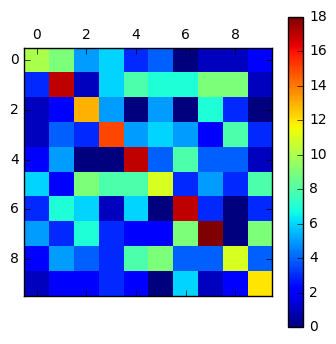

In [27]:
plt.matshow(image[0])
plt.colorbar()

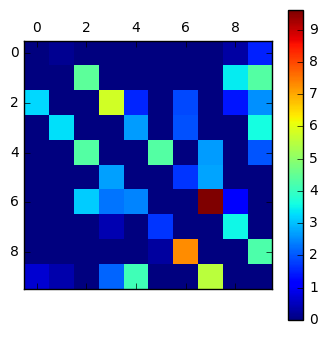

In [28]:
# conv channel 1
plt.matshow(H[0,:,:,0])
plt.colorbar()

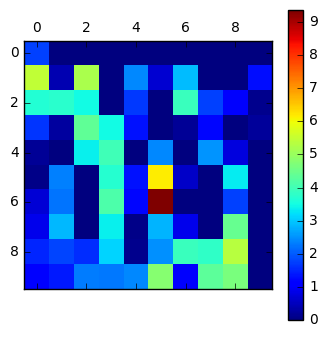

In [29]:
# conv channel 2
plt.matshow(H[0,:,:,1])
plt.colorbar()

In [30]:
pl = tf.nn.max_pool(h1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID') 

In [31]:
pl_size  = np.product([s.value for s in pl.get_shape()[1:]])

In [32]:
plf = tf.reshape(pl,[-1,pl_size])

P  = pl.eval(feed_dict={x:image})



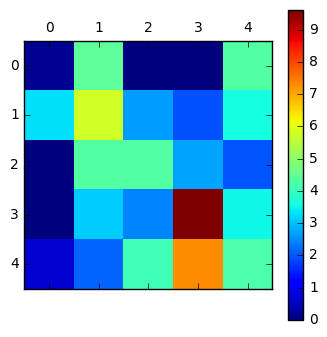

In [33]:
plt.matshow(P[0,:,:,0])
plt.colorbar()